# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

# pyplot style
sns.set_style("whitegrid")
sns.set_palette("pastel")

In [2]:
# Understand the variables
pd.options.display.max_colwidth = 10000

data_description_df = pd.read_csv('data/dictionary.txt', sep=':', names=['variable', 'description'])
data_description_df

,variable,description
0,country,Unique Identifier
1,incomeperperson,2010 Gross Domestic Product per capita in constant 2000 US$. The inflation but not the differences in the cost of living between countries has been taken into account.
2,alcconsumption,"2008 Alcohol consumption per adult (age 15+), litres Recorded and estimated average alcohol consumption, adult (15+) per capita consumption in litres pure alcohol"
3,armedforcesrate,Armed forces personnel (% of the total labour force)
4,breastcancerper100TH,"2002 breast cancer new cases per 100,000 females. Number of new cases of breast cancer in 100,000 female residents during a certain year."
5,co2emissions,"2006 cumulative CO2 emission (metric tons), Total amount of CO2 emission in metric tons since 1751."
6,femaleemployrate,"2007 female employees age 15+ (% of the population). Percentage of female population, age above 15, that has been employed during the given year."
7,HIVrate,2009 estimated HIV Prevalence % - (Ages 15-49). Estimated number of people living with HIV per 100 population of age group 15-49.
8,Internetuserate,2010 Internet users (per 100 people). Internet users are people with access to the worldwide network.
9,lifeexpectancy,2011 life expectancy at birth (years). The average number of years a newborn child would live if current mortality patterns were to stay the same.


# Get the Data

In [3]:
gapminder_df = pd.read_csv('data/gapminder_final.csv')


## Take a Quick Look at the Data Structure

Vamos a fijarnos en las cinco filas superiores utilizando el método head del DF

In [4]:
gapminder_df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
2,Central African Rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08


Cada fila representa un país. Hay 14 atributos para cada país.  
El metodo info nos permite tener una descripción rápida de los datos (segun el libro de hands on puedo usarlo antes de hacer el split de data),en particular el número total de filas,  
el tipo de cada atributo y el número de valores no nulos

In [5]:
gapminder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               178 non-null    object 
 1   incomeperperson       175 non-null    float64
 2   alcconsumption        178 non-null    float64
 3   armedforcesrate       174 non-null    float64
 4   breastcancerper100th  177 non-null    float64
 5   co2emissions          176 non-null    float64
 6   femaleemployrate      177 non-null    float64
 7   hivrate               155 non-null    float64
 8   internetuserate       174 non-null    float64
 9   lifeexpectancy        178 non-null    float64
 10  oilperperson          67 non-null     float64
 11  polityscore           167 non-null    float64
 12  relectricperperson    141 non-null    float64
 13  suicideper100th       178 non-null    float64
 14  employrate            177 non-null    float64
 15  urbanrate             1

Hay 178 instancias en el conjunto de datos, lo que significa que es bastante pequeño según los estándares de ml  
el atributo oilperperson solo 67 valores no nulos lo que es cerca del 62% de valores faltantes (me ocupare de borrar esta columna más adelante)  
Todos los atributos son númericos

## Remove duplicates

Antes de continuar con el split de data se deben corregir los duplicados (parciales y totales) debido a que  
estos pueden ser causados por problemas en la extracción de datos lo que los puede hacer contradictorios o redundantes.  
Además, imagina por un momento que tienes un dato duplicado por simplificar el dato duoplicado esta dos veces en tu df.  

*caso 1:* Uno de los valores se queda en test y el otro en train, lo que "es trampa" estas probando la calidad del modelo para generalizar  
con un dato de entrenamiento.

*caso 2:* Los dos valores quedan en test, ahora el problema es que estás dando más peso en los coeficientes a ciertas particularidades que  
tiene el dato duplicado.

*caso 3:* Los dos valores quedan en train, en este caso estas juzgando mal el error del modelo pues un valor ahora influye más (el repetido).

Comenzaré explorando los duplicados del identificador unico.

In [6]:
country_duplicated = gapminder_df[gapminder_df.duplicated(subset='country')]

country_duplicated

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
32,Switzerland,37662.751250,11.41,0.524220,81.7,2.406741e+09,57.000000,0.4,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48
39,Oman,11191.811010,0.92,4.465998,13.2,4.879930e+08,22.600000,0.1,61.987413,72.974,NaN,-8.0,2124.608816,3.716739,50.700001,71.62
74,"Macedonia, FYR",2221.185664,8.94,2.101467,52.1,1.688830e+08,26.799999,NaN,51.914184,74.847,NaN,9.0,NaN,7.876878,34.900002,66.90
111,Sudan,523.950151,2.56,0.969499,22.5,2.250197e+08,27.900000,1.1,NaN,61.452,NaN,-4.0,50.892101,9.709556,47.299999,43.44
120,Malaysia,5184.709328,0.87,1.142127,30.8,2.670950e+09,43.099998,0.5,56.300034,74.221,0.890813,6.0,767.970324,8.211067,60.500000,70.36
124,Iran,2161.546510,1.03,2.026400,17.1,9.183548e+09,26.900000,0.2,13.000111,72.974,1.162576,-7.0,753.209802,6.021882,47.799999,68.46
143,Lithuania,5332.238591,16.30,1.487831,38.5,2.262553e+08,48.799999,0.1,62.811900,72.231,0.812369,10.0,758.858719,33.341860,53.099998,66.96
148,Belarus,2737.670379,18.85,3.711930,36.0,9.998743e+08,48.599998,0.3,32.052144,70.349,0.687828,-7.0,614.907287,26.874690,53.400002,73.46
149,Vietnam,722.807559,3.91,1.085367,16.2,1.425435e+09,67.599998,0.4,27.851822,75.181,NaN,-7.0,302.725655,11.653322,71.000000,27.84
155,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34


In [7]:
country_duplicated_count = gapminder_df.duplicated(subset='country').sum()
country_duplicated_names_values = gapminder_df['country'].value_counts(ascending= False)

country_duplicated_names_values.head(country_duplicated_count)

Ireland           2
Luxembourg        2
Malaysia          2
Belarus           2
Tajikistan        2
Iran              2
Macedonia, FYR    2
Sudan             2
Lithuania         2
Vietnam           2
Switzerland       2
Oman              2
Name: country, dtype: int64

Como se puede ver los duplicados parciales son en total 12 y estos paises solo se repiten 2 veces, vamos a ver si son duplicados exactos también

In [8]:
gapminder_df[gapminder_df.duplicated()]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
32,Switzerland,37662.751250,11.41,0.524220,81.7,2.406741e+09,57.000000,0.4,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48
39,Oman,11191.811010,0.92,4.465998,13.2,4.879930e+08,22.600000,0.1,61.987413,72.974,NaN,-8.0,2124.608816,3.716739,50.700001,71.62
74,"Macedonia, FYR",2221.185664,8.94,2.101467,52.1,1.688830e+08,26.799999,NaN,51.914184,74.847,NaN,9.0,NaN,7.876878,34.900002,66.90
111,Sudan,523.950151,2.56,0.969499,22.5,2.250197e+08,27.900000,1.1,NaN,61.452,NaN,-4.0,50.892101,9.709556,47.299999,43.44
120,Malaysia,5184.709328,0.87,1.142127,30.8,2.670950e+09,43.099998,0.5,56.300034,74.221,0.890813,6.0,767.970324,8.211067,60.500000,70.36
124,Iran,2161.546510,1.03,2.026400,17.1,9.183548e+09,26.900000,0.2,13.000111,72.974,1.162576,-7.0,753.209802,6.021882,47.799999,68.46
143,Lithuania,5332.238591,16.30,1.487831,38.5,2.262553e+08,48.799999,0.1,62.811900,72.231,0.812369,10.0,758.858719,33.341860,53.099998,66.96
148,Belarus,2737.670379,18.85,3.711930,36.0,9.998743e+08,48.599998,0.3,32.052144,70.349,0.687828,-7.0,614.907287,26.874690,53.400002,73.46
149,Vietnam,722.807559,3.91,1.085367,16.2,1.425435e+09,67.599998,0.4,27.851822,75.181,NaN,-7.0,302.725655,11.653322,71.000000,27.84
155,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34


In [9]:
gapminder_df.duplicated(subset='country').sum()

12

Afortunadamente los 12 registros son duplicados exactos por lo que podemos eliminarlos del dataset sin mayores inconvenientes. 
Entonces, el tamaño del dataframe realmente es de 166 x 16 columnas de las cuales 1 es un identificador (country) y otra es la variable
"y"

In [10]:
gapminder_df_no_duplicates = gapminder_df.drop_duplicates().copy()

A continuación borro los nans de la variable a predecir.  
En este caso lo hago previo al split de datos debido a que pueden  
ocurrir casos similares a los planteados para duplicados.

Por otro lado, imputar los valores faltantes de esta variable  antes o después de hacer el split  
no permite saber con certeza si el modelo es bueno prediciendo el GDP o  
es bueno prediciendo la imputación de GDP


In [11]:
gapminder_df_no_duplicates.dropna(subset=['incomeperperson'],inplace= True)

In [12]:
gapminder_df_no_duplicates

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
2,Central African Rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Mexico,6105.280743,8.55,0.612340,26.4,1.330450e+10,39.599998,0.3,31.050013,76.954,0.770567,8.0,431.625379,4.288574,57.900002,77.20
174,Mauritius,5182.143721,3.53,0.349544,31.6,5.947333e+07,36.299999,1.0,28.731883,73.373,NaN,10.0,NaN,8.081540,54.500000,42.48
175,Namibia,2667.246710,12.09,1.972913,24.7,2.620933e+07,37.299999,13.1,6.500823,62.465,NaN,6.0,0.000000,8.021970,42.000000,36.84
176,Comoros,336.368749,0.28,NaN,19.5,2.368667e+06,59.299999,0.1,5.098265,61.061,NaN,9.0,NaN,4.751084,68.000000,28.08


Así, las dimensiones del conjunto de datos son de 163 observaciones con 16 columnas
Veamos las distribuciones básicas de los datos, nuevamente  Hands on dice que no hay problema hacer este paso previo al split de data.

Saving figure attribute_histogram_plots


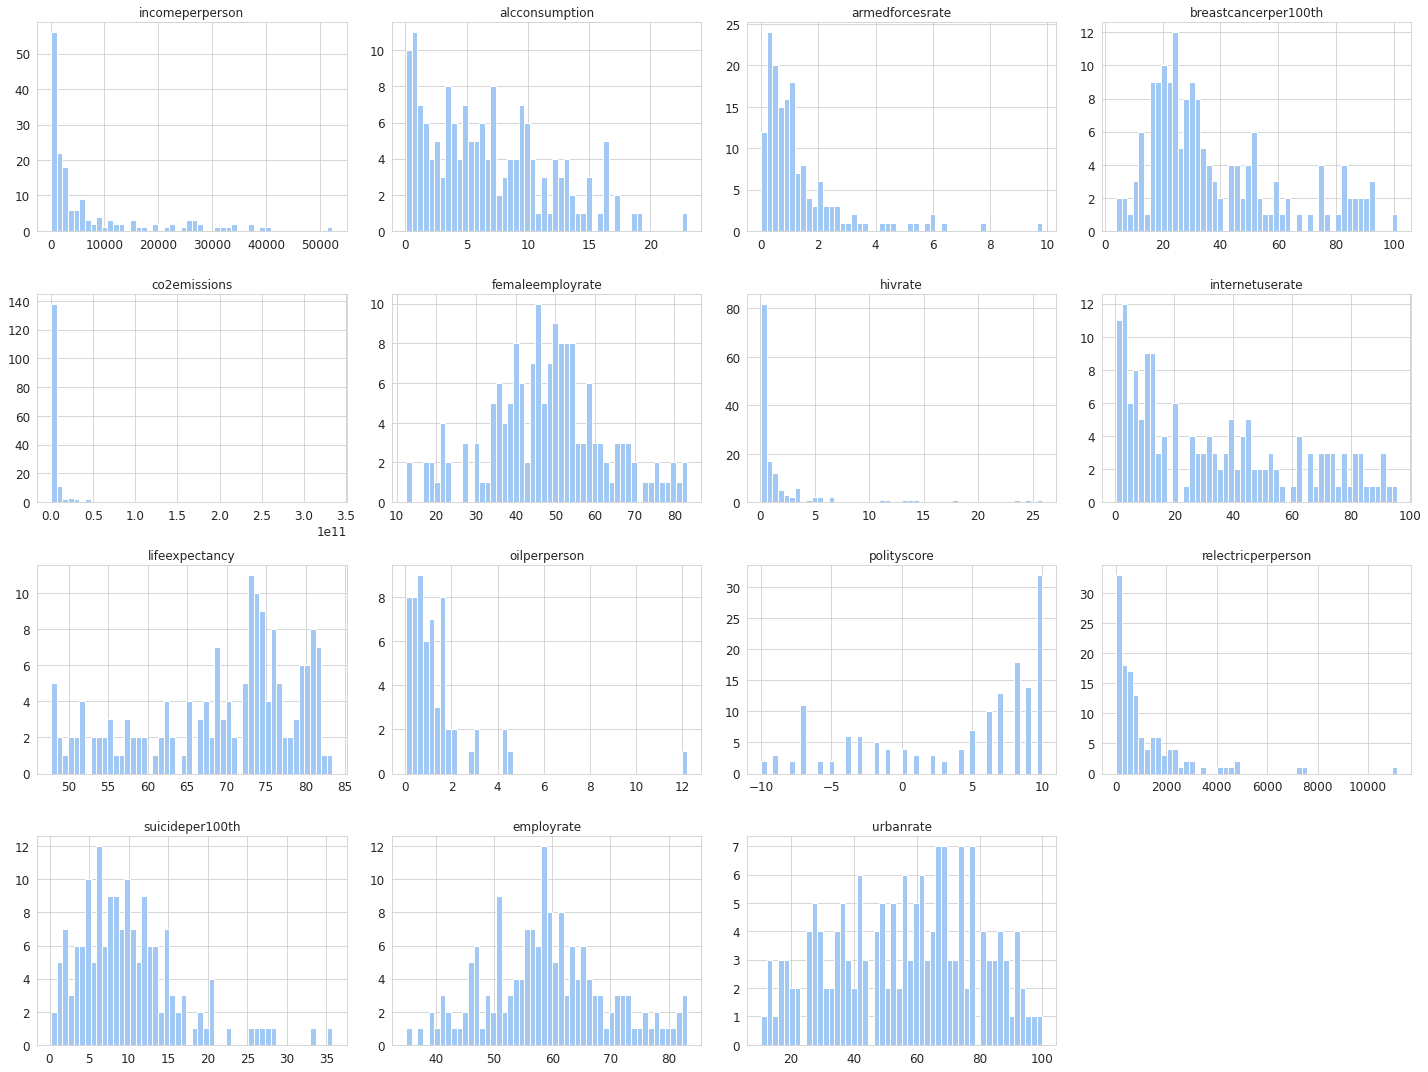

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
gapminder_df_no_duplicates.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

estos atributos tienen escalas diferentes. Trataré esto más adelante

## Create a Test Set

In [14]:
# to make this notebook's output identical at every run
np.random.seed(42)

Debido a que el conjunto de datos es pequeño corremos el riesgo de introducir sesgo muestral significante haciendo muestreo aleatorio  
por lo que procedo a un muestreo estratificado.  
Entonces, hago un cruce de datos con gpt para encontrar el continente de cada país y que este sea la ráíz para poder estratificar


In [15]:
# Diccionario de continentes y sus respectivos países
continent_dict = {
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia',
             'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
             'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
             'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia',
             'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Turkey',
             'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen','Korea, Rep.','Yemen, Rep.','Timor-Leste'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
               'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
               'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia',
               'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
               'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
               'United Kingdom', 'Vatican City','Ireland','Albania','Macedonia, FYR','Slovak Republic','Czech Rep.'],
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon',
               'Central African Republic','Central African Rep.', 'Chad', 'Comoros', 'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea',
               'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast',
               'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
               'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
               'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo',
               'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe','Central African Rep.','Cape Verde','Swaziland','Congo, Dem. Rep.'
               'Congo, Rep.',"Cote d'Ivoire",'Congo, Rep.','Congo, Dem. Rep.'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba',
                      'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras',
                      'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia',
                      'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States','Dominican Rep.'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru',
                      'Suriname', 'Uruguay', 'Venezuela'],
    'Australia/Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand',
                          'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'Antarctica': ['Antarctica']
}

# Función para obtener el continente basado en el país
def get_continent(country):
    for continent, countries in continent_dict.items():
        if country in countries:
            return continent
    return 'Unknown'  # Si el país no está en la lista

# Agregar columna de continente al DataFrame
gapminder_df_no_duplicates['continent'] = gapminder_df_no_duplicates['country'].apply(get_continent)

# Mostrar las primeras filas del DataFrame actualizado
gapminder_df_no_duplicates.head()


,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,continent
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34,Europe
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72,Europe
2,Central African Rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58,Africa
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84,North America
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08,Europe


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

# Definir el split estratificado
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Realizar el split basado en la columna 'continent'
for train_index, test_index in split.split(gapminder_df_no_duplicates, gapminder_df_no_duplicates["continent"]):
    strat_train_set = gapminder_df_no_duplicates.iloc[train_index]
    strat_test_set = gapminder_df_no_duplicates.iloc[test_index]

# Verificar la proporción de registros por continente en el conjunto de entrenamiento y el conjunto de prueba
train_prop = strat_train_set['continent'].value_counts() / len(strat_train_set)
test_prop = strat_test_set['continent'].value_counts() / len(strat_test_set)

train_prop, test_prop


(Africa               0.307692
 Asia                 0.261538
 Europe               0.223077
 North America        0.100000
 South America        0.076923
 Australia/Oceania    0.030769
 Name: continent, dtype: float64,
 Africa               0.303030
 Asia                 0.272727
 Europe               0.212121
 North America        0.121212
 South America        0.060606
 Australia/Oceania    0.030303
 Name: continent, dtype: float64)

In [17]:
"""from sklearn.model_selection import StratifiedShuffleSplit

# Definir el split estratificado
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Categorizar la columna 'incomeperperson' en diferentes bins
gapminder_df_no_duplicates["income_cat"] = pd.cut(gapminder_df_no_duplicates["incomeperperson"],
                               bins=[0., 1000, 5000, 10000, 50000, np.inf],
                               labels=[1, 2, 3, 4, 5])


# Combinar categoría 5 con categoría 4
gapminder_df_no_duplicates['income_cat'].where(gapminder_df_no_duplicates['income_cat'] != 5, 4, inplace=True)

# Realizar split estratificado nuevamente basado en 'income_cat'
for train_index, test_index in split.split(gapminder_df_no_duplicates, gapminder_df_no_duplicates["income_cat"]):
    strat_train_set = gapminder_df_no_duplicates.iloc[train_index]
    strat_test_set = gapminder_df_no_duplicates.iloc[test_index]

# Verificar la proporción de registros por categoría de ingreso en el conjunto de entrenamiento y el conjunto de prueba
train_prop_income_resolved = strat_train_set['income_cat'].value_counts() / len(strat_train_set)
test_prop_income_resolved = strat_test_set['income_cat'].value_counts() / len(strat_test_set)

train_prop_income_resolved, test_prop_income_resolved
"""

'from sklearn.model_selection import StratifiedShuffleSplit\n\n# Definir el split estratificado\nsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)\n# Categorizar la columna \'incomeperperson\' en diferentes bins\ngapminder_df_no_duplicates["income_cat"] = pd.cut(gapminder_df_no_duplicates["incomeperperson"],\n                               bins=[0., 1000, 5000, 10000, 50000, np.inf],\n                               labels=[1, 2, 3, 4, 5])\n\n\n# Combinar categoría 5 con categoría 4\ngapminder_df_no_duplicates[\'income_cat\'].where(gapminder_df_no_duplicates[\'income_cat\'] != 5, 4, inplace=True)\n\n# Realizar split estratificado nuevamente basado en \'income_cat\'\nfor train_index, test_index in split.split(gapminder_df_no_duplicates, gapminder_df_no_duplicates["income_cat"]):\n    strat_train_set = gapminder_df_no_duplicates.iloc[train_index]\n    strat_test_set = gapminder_df_no_duplicates.iloc[test_index]\n\n# Verificar la proporción de registros por categor

# Data quality

Se procede eliminando las columnas que tienen más de  
20% de datos faltantes

In [18]:

missing_data = strat_train_set.isnull().sum() / len(strat_train_set)

#Find columns that have more than 20% missing data
columns_to_drop = missing_data[missing_data > 0.2].index

strat_train_set = strat_train_set.drop(columns=columns_to_drop)

columns_strat_train_set_cleaned = strat_train_set.columns # storage the names of columns
strat_train_set.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 98 to 117
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               130 non-null    object 
 1   incomeperperson       130 non-null    float64
 2   alcconsumption        130 non-null    float64
 3   armedforcesrate       127 non-null    float64
 4   breastcancerper100th  129 non-null    float64
 5   co2emissions          128 non-null    float64
 6   femaleemployrate      129 non-null    float64
 7   hivrate               114 non-null    float64
 8   internetuserate       128 non-null    float64
 9   lifeexpectancy        130 non-null    float64
 10  polityscore           121 non-null    float64
 11  suicideper100th       130 non-null    float64
 12  employrate            129 non-null    float64
 13  urbanrate             130 non-null    float64
 14  continent             130 non-null    object 
dtypes: float64(13), object

se eliminan las columnas 'oilperperson'y 'relectricperperson'

# Discover and Visualize the Data to Gain Insights

Saving figure hist_incomeperperson


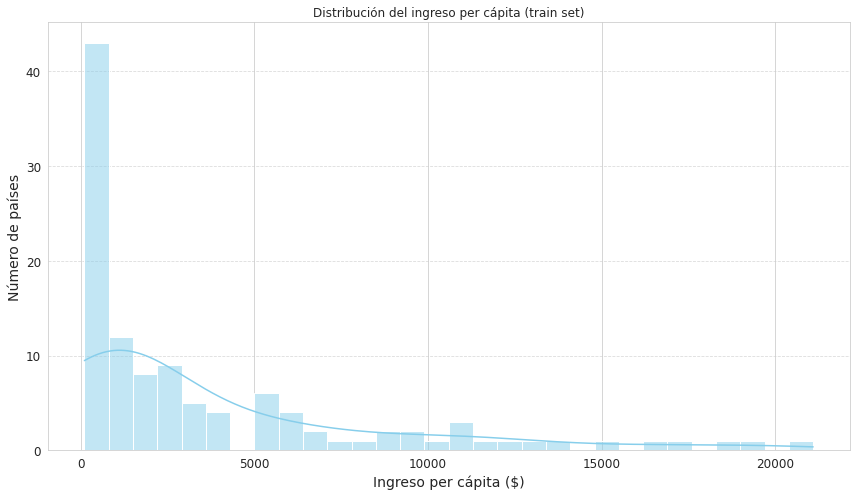

In [19]:
# Calculate the Interquartile Range (IQR) for the price column
q1 = strat_train_set["incomeperperson"].quantile(0.25)
q3 = strat_train_set["incomeperperson"].quantile(0.75)
iqr = q3 - q1

# Define bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to exclude outliers based on the price_float column
filtered_strat_train_set = strat_train_set[ (strat_train_set["incomeperperson"] <= upper_bound) & (strat_train_set["incomeperperson"] >= lower_bound) ]

plt.figure(figsize=(12, 7))
sns.histplot(filtered_strat_train_set['incomeperperson'], bins=30, kde=True, color='skyblue')

plt.title('Distribución del ingreso per cápita (train set)')
plt.xlabel('Ingreso per cápita ($)')
plt.ylabel('Número de países')
plt.grid(axis='y', linestyle='--', alpha=0.7)
save_fig("hist_incomeperperson")
plt.tight_layout()
plt.show()


## Looking for Correlations

Ahora vamos a ver cuánto se correlaciona cada atributo con el valor de incomeperperson:

In [20]:
corr_matrix = strat_train_set.corr()
corr_matrix["incomeperperson"].sort_values(ascending=False)

incomeperperson         1.000000
internetuserate         0.821829
breastcancerper100th    0.746245
urbanrate               0.612010
lifeexpectancy          0.607645
alcconsumption          0.292787
co2emissions            0.291826
polityscore             0.259034
femaleemployrate        0.063072
armedforcesrate         0.047202
employrate              0.041503
suicideper100th        -0.031547
hivrate                -0.218728
Name: incomeperperson, dtype: float64

Saving figure corr_matrix


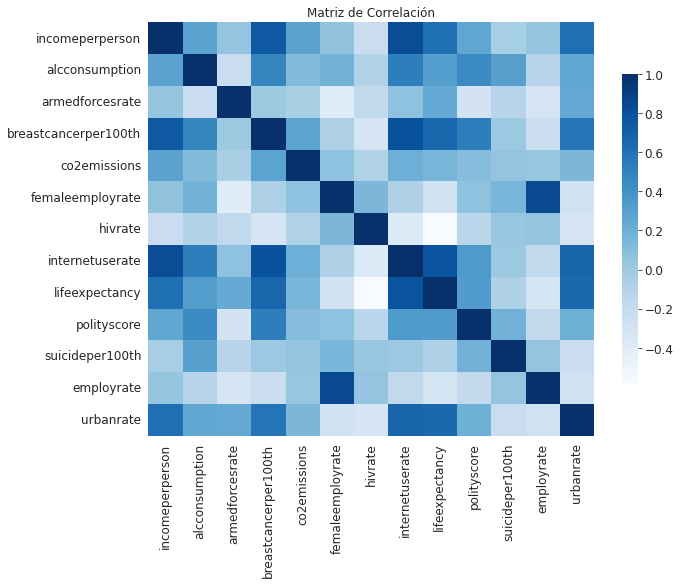

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='Blues', linewidths=0, cbar_kws={"shrink": 0.75},fmt='.1f')
save_fig("corr_matrix")
plt.title("Matriz de Correlación")

plt.show()

Saving figure corr_vector


/tmp/ipykernel_10543/2413020772.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


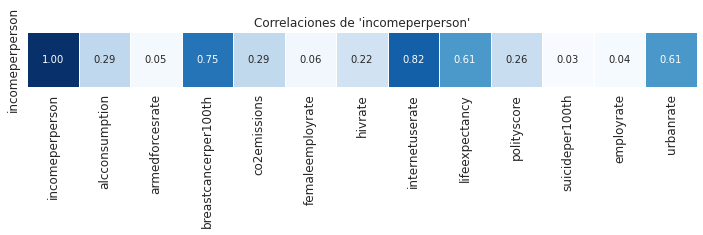

In [22]:
income_corr = corr_matrix.loc["incomeperperson", :].abs().to_frame().T
plt.figure(figsize=(12, 1))
sns.heatmap(income_corr, annot=True, cmap="Blues", linewidths=.5,fmt='.2f',cbar= False)
save_fig("corr_vector")
plt.title("Correlaciones de 'incomeperperson'")
plt.xticks(rotation=90)
plt.show()

Saving figure corr_barplot


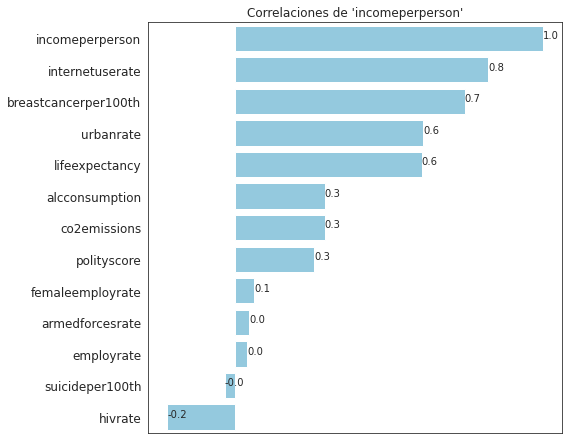

In [23]:
corr_values = corr_matrix["incomeperperson"].sort_values(ascending= False)

plt.figure(figsize=(8, 6))
sns.set_style("white") 
ax = sns.barplot(y=corr_matrix["incomeperperson"].sort_values(ascending=False).index, x=corr_matrix["incomeperperson"].sort_values(ascending=False).values,color='skyblue')

for index, value in enumerate(corr_values):
    ax.text(value, index, '{:.1f}'.format(value))
    
plt.xlabel('')
plt.xticks([])
save_fig("corr_barplot")
plt.title("Correlaciones de 'incomeperperson'")
plt.show()

El coeficiente de relación permite visualizar las variables prometedoras dada su relación con  
la variable objetivo y por lo tanto las quepuedo usar en la regresión lineal.  

Ahora, puedo observar qué otras variables tienen alta correlación ENTRE ELLAS para no colocar las dos variables  
al tiempo en el modelo y así poder evitar problemas de homosedasticidad.

In [24]:
highly_correlated_variables = []
for name, row in corr_matrix.iterrows():
    for col_name, value in row.iteritems():
        if value > 0.8 and name != col_name and (col_name, name, value) not in highly_correlated_variables and (col_name!='incomeperperson'):
            highly_correlated_variables.append((name, col_name, value))
        
highly_correlated_variables

[('incomeperperson', 'internetuserate', 0.821829249054112),
 ('femaleemployrate', 'employrate', 0.8473206984045728)]

como se observa en caso de elegir tasa de empleo no  
parece ser buena idea escoger la tasa de empleo femenido y viceversa.

Procedo a hacer la visualización de la disperción de los atributos v.s  
la variable objetivo. 
Debido al número de atributos nos centraremos en  aquellos que por su correlación
parezcan más prometedores

Saving figure scatter_matrix_plot


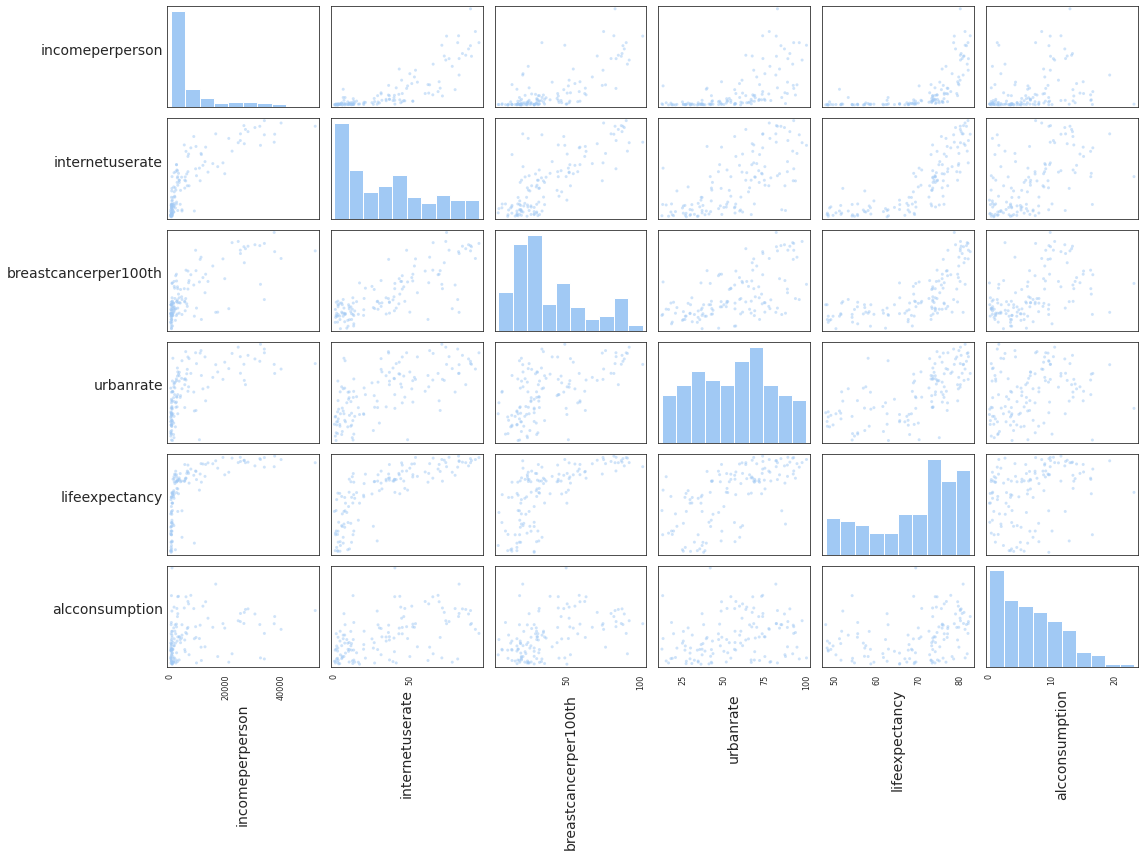

In [25]:
from pandas.plotting import scatter_matrix

top_attributes = corr_matrix["incomeperperson"].abs().sort_values(ascending=False).index
attributes = corr_matrix["incomeperperson"].abs().sort_values(ascending=False).head(6).index

axarr = scatter_matrix(strat_train_set[attributes], figsize=(16, 12), diagonal='hist')


for ax in axarr[:, 0]:  # ajusta las etiquetas del eje y
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.set_yticks([])

for ax in axarr[-1, :]:  # ajusta las etiquetas del eje x
    ax.xaxis.label.set_rotation(90)

plt.tight_layout()

save_fig("scatter_matrix_plot")


plt.show()

Con la gráfica anterior notamos un problema. Debido a que la correlación de Pearson solo mide relaciones lineales pueden perderse relaciones no lineales al  
usar este como el único criterio.  
Vamos a visualizar la relación entre la variable objetivo y las demás variables

Saving figure incomeperperson_scatter_matrix_plot


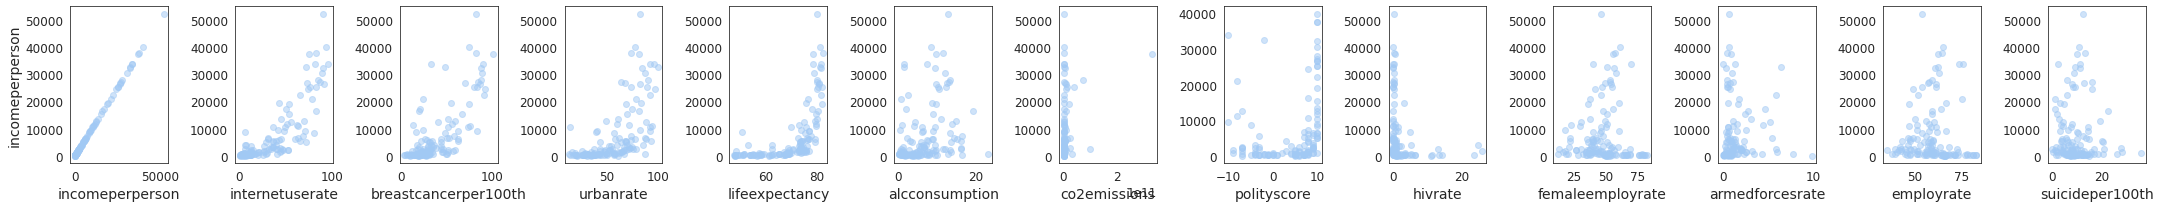

In [26]:
# Create a grid of subplots
fig, axarr = plt.subplots(nrows=1, ncols=len(top_attributes), figsize=(30, 3))

# For each attribute in top_attributes, plot it against "incomeperperson"
for i, attribute in enumerate(top_attributes):
    ax = axarr[i]
    
    # Scatter plot
    ax.scatter(strat_train_set[attribute], strat_train_set['incomeperperson'], alpha=0.5)
    
    # Set labels
    ax.set_xlabel(attribute)
    if i == 0:  # Only set y-label for the first plot
        ax.set_ylabel('incomeperperson')

# Adjust layout for better visualization
plt.tight_layout()

# Save the scatter matrix plot
save_fig("incomeperperson_scatter_matrix_plot")

# Display the scatter matrix plot
plt.show()

Saving figure income_vs_life_expectancy_train_set.png


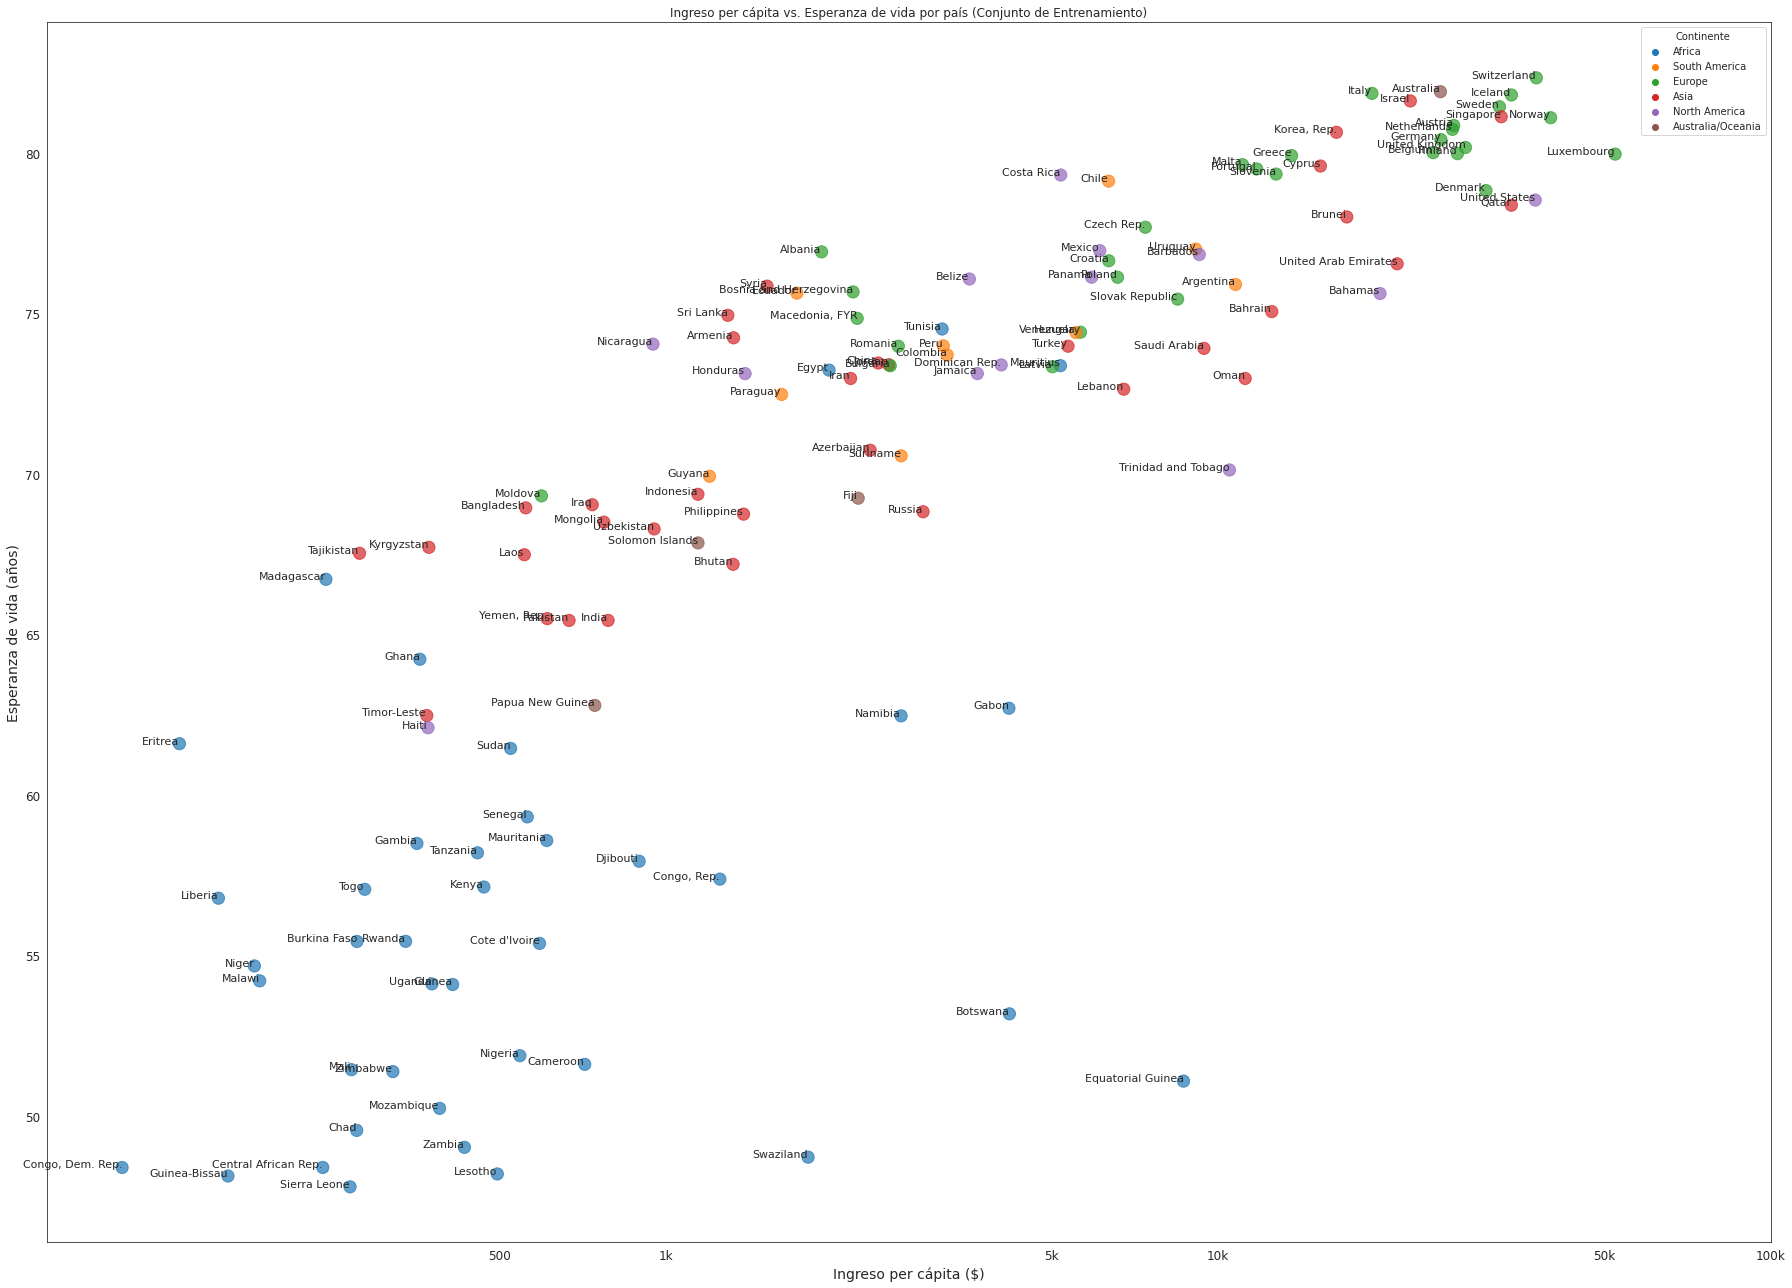

In [27]:
# Crear el scatter plot con las correcciones indicadas para strat_train_set
plt.figure(figsize=(25, 18))

sns.scatterplot(data=strat_train_set, y='lifeexpectancy',  x='incomeperperson', hue='continent', palette='tab10',  s= 150, 
                alpha=0.7, edgecolor=None,legend="brief")
for i, country in enumerate(strat_train_set['country']):
    plt.text(strat_train_set['incomeperperson'].iloc[i], strat_train_set['lifeexpectancy'].iloc[i], country, fontsize=11, ha='right')
    
plt.title('Ingreso per cápita vs. Esperanza de vida por país (Conjunto de Entrenamiento)')
plt.xlabel('Ingreso per cápita ($)')
plt.ylabel('Esperanza de vida (años)')
plt.xscale('log')  # Escala logarítmica en el eje X
plt.xticks([500, 1000, 5000, 10000, 50000, 100000], ['500', '1k', '5k', '10k', '50k', '100k'])
plt.grid(False)  # Quitar las líneas de fondo
plt.legend(title='Continente')
plt.tight_layout()

# Guardar la gráfica
save_fig("income_vs_life_expectancy_train_set.png")

# Mostrar la gráfica
plt.show()


# Prepare the Data for Machine Learning Algorithms

In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("continent", axis=1, inplace=True)

/home/andres/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
gdp = strat_train_set.drop("incomeperperson", axis=1) # drop labels for training set
gdp_labels = strat_train_set["incomeperperson"].copy()

In [30]:
gdp2 = gdp.copy()
gdp2.columns

Index(['country', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th',
       'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate',
       'lifeexpectancy', 'polityscore', 'suicideper100th', 'employrate',
       'urbanrate'],
      dtype='object')

In [31]:
gdp =  gdp[['alcconsumption', 'armedforcesrate', 'breastcancerper100th',
       'co2emissions', 'hivrate', 'internetuserate',
       'lifeexpectancy', 'polityscore', 'suicideper100th', 'employrate',
       'urbanrate']]

## Data Cleaning

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

gdp_num = gdp.copy()
imputer.fit(gdp_num)
imputer.statistics_

array([6.00000000e+00, 8.15647700e-01, 3.00000000e+01, 2.45136833e+08,
       4.00000000e-01, 2.94396991e+01, 7.30500000e+01, 7.00000000e+00,
       8.48735729e+00, 5.87999992e+01, 5.67500000e+01])

In [33]:
X = imputer.transform(gdp_num)
strat_train_set_tr = pd.DataFrame(X, columns=gdp_num.columns,
                          index=gdp.index)
strat_train_set_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 98 to 117
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcconsumption        130 non-null    float64
 1   armedforcesrate       130 non-null    float64
 2   breastcancerper100th  130 non-null    float64
 3   co2emissions          130 non-null    float64
 4   hivrate               130 non-null    float64
 5   internetuserate       130 non-null    float64
 6   lifeexpectancy        130 non-null    float64
 7   polityscore           130 non-null    float64
 8   suicideper100th       130 non-null    float64
 9   employrate            130 non-null    float64
 10  urbanrate             130 non-null    float64
dtypes: float64(11)
memory usage: 12.2 KB


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

gdp_prepared = full_pipeline.fit_transform(gdp_num)

In [35]:
gdp_prepared.shape

(130, 11)

# run the first linear regression

## Training and Evaluating on the Training Set

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(gdp_prepared, gdp_labels)

LinearRegression()

Ya que tengo el modelo de regresión lineal. Voy a probarlo con algunas instancias del conjunto  
de entrenamiento

In [37]:
some_data = gdp.iloc[:5]


some_labels = gdp_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 2676.76987978  8658.24009033  -475.59661925  9235.21896739
 -3843.62290925]


In [38]:
print("Labels:", list(some_labels))

Labels: [523.9501515, 3180.430612, 131.796207, 6334.105194, 103.7758572]


In [39]:
from sklearn.metrics import mean_squared_error

gdp_predictions = lin_reg.predict(gdp_prepared)
lin_mse = mean_squared_error(gdp_labels, gdp_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4757.067106987673

In [40]:
gdp_labels.describe()

count      130.000000
mean      7406.102476
std      10736.834328
min        103.775857
25%        569.048425
50%       2287.786645
75%       9209.272098
max      52301.587180
Name: incomeperperson, dtype: float64

In [41]:
from sklearn.metrics import mean_absolute_error


lin_mae = mean_absolute_error(gdp_labels, gdp_predictions)
lin_mae

3339.311024840741